# [Can You Survive Squid Game (Season 2)?](https://thefiddler.substack.com/p/can-you-survive-squid-game-season)
## January 10 2025

## Problem

_In Season 2 of Squid Game, contestants play a game of “Mingle” (spoiler alert!). For each round of this game, the contestants all wait in a common area until a number is called. They must then split up into groups of that number. Any contestants not in a group of the correct number after 30 seconds … well, let’s just say bad things happen to them. For now, we’ll refer to contestants who make it through a round in a group of the correct size as having “survived” the round._

_Suppose there are initially N contestants._

_In the first round, contestants must form groups of 1. Okay, that’s not too hard; everyone survives. In the second round, contestants must form groups of 2. This continues (with groups of k in round k) until the 38th round, when contestants must form groups of 38._

_What is the smallest number N such that there is at least one person who survives all 38 rounds?_

## Solution

Let's start from the end. We know that in order for at least one person to survive after the 38th round, there must be at least 38 people in the game. Taking a step back, in the previous round, we organized into groups of 37 people.  In order to have 38 for the next round, we would need at least 2 groups of 37 people. This means that the number of people in the game must be at least $2 \times 37 = 74$. Similarly, we need at least 3 groups of 36 people to ensure we meet the minimum number needed in the the 37th round. This pattern goes on for a while until we're about half way done. At round 19, we need 20 groups for a total of 380 people. Once we advance from there though, there's no more guarantee that $i*(n-i)$ will continue to increase, we can't just increase the number of groups by 1. We may need to add more.  In general, the number of people we need can be computed as below.

$$ N = 38 $$
$$ \left\lceil \frac{N}{i} \right\rceil i \rightarrow N $$
$$ \text{ for i = 38 to 1} $$

I'm curious if there is a more tidy analytic solution that makes clear how N as the rounds increase but I wasn't able to figure out any slick ways of converting the recursive solution into a closed form. 

n = 38: total = 454
Fit: total = 0.32 * exp(2.00 * n)


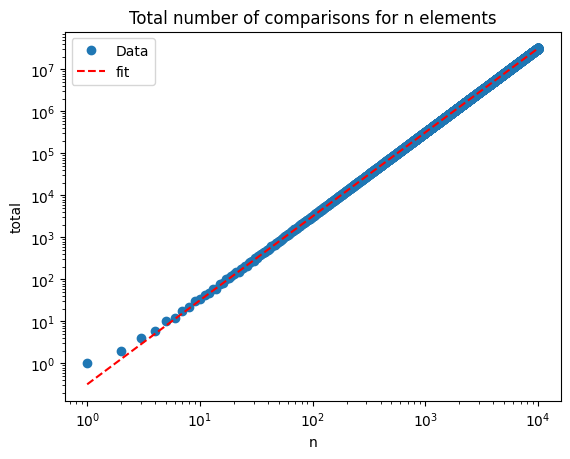

In [15]:
import math
from matplotlib import pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def compute_total(n):
    total = n
    for m in range(n - 1, 0, -1):
        total = m * math.ceil(total / m)
    return total

print('n = 38: total =', compute_total(38))

n_values = list(range(1, 10001))
total_values = [compute_total(n) for n in n_values]

# Fit an power law function to the data
def func(n, a, b):
    return a * n ** b

# Provide an initial guess for the parameters
initial_guess = [1, 2]

popt, pcov = curve_fit(func, n_values, total_values, p0=initial_guess)
print('Fit: total = {:.2f} * exp({:.2f} * n)'.format(*popt))

# Plot the fit
plt.plot(n_values, total_values, 'o', label='Data')
plt.plot(n_values, func(np.array(n_values), *popt), 'r--', label='fit')
plt.yscale('log')
plt.xscale('log')
plt.xscale('log')
plt.xlabel('n')
plt.ylabel('total')
plt.title('Total number of comparisons for n elements')
plt.legend()
plt.show()

Asymptotically, the solution is $O(n^2)$. 

## Extra Credit

_There are N contestants about to play Mingle, where N is less than 500. This time, in each round, the number for group size can be anywhere from 1 to 10, with each number equally likely to be called. Also, the numbers called in the rounds are all independent of each other. It appears this version of Mingle will continue until there are no more survivors._

_Before the game starts, one of the contestants, Young-il, does some quick computation. He says to his companion, Gi-hun: “Oh no, it’s too bad we only have N people.” (Of course, Young-il doesn’t actually say “N,” but rather the number that N represents.)_

_Young-il continues: “If we had started with N+1 people instead, I’d expect the game to last about 10 more rounds, on average.”_

_What is the value of N?_

## Extra Credit Solution

I tried to approach this problem from a more mathematical perspective with the hope that there might be a tidy closed form solution. I wasn't able to find one. Instead I had to setter for a recursive relationship to compute the expected number of rounds for a given number of people.

Let's consider the expected number of steps needed to get from $n$ people to 0.  Given some $k$ group size sampled uniformly, we may remove anywhere between 0 and $k-1$ people, let's call it $r$. Figuring out $r$ is pretty simple since we know we sample $k$ unformly. Once we've remove $r$ people, we know consider the expected number of steps to get from $n-r$ to 0. This we have a recurence relationship.

$$ \mathbb{E}(n) = 1 + \frac{1}{10} \sum_{k=1}^{10} \mathbb{E} \left( \left\lfloor \frac{n}{k} \right\rfloor k \right) $$

Now, if we were using this to construct a system of equations, this would be ok (though obsenely massive and impractical) but it makes more sense to just perform the computation iteratively. Starting at $\mathbb{E}(0) = 0$ and advancing to $\mathbb{E}(1), \mathbb{E}(2), \ldots, \mathbb{E}(N)$. However, doing it this creates one issues: in cases where $k$ divides $n$, we will have a cycle. For example, if $n=6$, the $k=3$ term will still include $\mathbb{E}(6)$ in the sum which we haven't computed yet. To get around this, we just need to add a little extra logic to the summation and modify our recurrence relationship slightly.

Separate the terms where $ g \mid n $ and $ g \nmid n $:
$$
\mathbb{E}(n) = 1 + \frac{1}{10} \left( \sum_{\substack{g=1 \\ g \nmid n}}^{10} \mathbb{E} \left( g \cdot \left\lfloor \frac{n}{g} \right\rfloor \right) + \sum_{\substack{g=1 \\ g \mid n}}^{10} \mathbb{E} \left( g \cdot \left\lfloor \frac{n}{g} \right\rfloor \right) \right)
$$

For $ g \mid n $, we know:
$$
g \cdot \left\lfloor \frac{n}{g} \right\rfloor = n \quad \implies \quad \mathbb{E} \left( g \cdot \left\lfloor \frac{n}{g} \right\rfloor \right) = \mathbb{E}(n)
$$

$$
\implies \sum_{\substack{g=1 \\ g \mid n}}^{10} \mathbb{E} \left( g \cdot \left\lfloor \frac{n}{g} \right\rfloor \right) = k \cdot \mathbb{E}(n)
$$
where $ k $ is the number of group sizes $ g \in \{1, 2, \ldots, 10\} $ that divide $ n $.

Substitute this result into the original equation:
$$
\mathbb{E}(n) = 1 + \frac{1}{10} \left( \sum_{\substack{g=1 \\ g \nmid n}}^{10} \mathbb{E}\left( g \cdot \left\lfloor \frac{n}{g} \right\rfloor \right) + k \cdot \mathbb{E}(n) \right)
$$

$$
\mathbb{E}(n) - \frac{k}{10} \mathbb{E}(n) = 1 + \frac{1}{10} \sum_{\substack{g=1 \\ g \nmid n}}^{10} \mathbb{E}\left( g \cdot \left\lfloor \frac{n}{g} \right\rfloor \right)
$$

$$
\mathbb{E}(n) \left( 1 - \frac{k}{10} \right) = 1 + \frac{1}{10} \sum_{\substack{g=1 \\ g \nmid n}}^{10} \mathbb{E}\left( g \cdot \left\lfloor \frac{n}{g} \right\rfloor \right)
$$

$$
\mathbb{E}(n) = \frac{10 + \sum_{\substack{g=1 \\ g \nmid n}}^{10} \mathbb{E}\left( g \cdot \left\lfloor \frac{n}{g} \right\rfloor \right)}{10 - k}
$$

And we're left with: 
$$
\mathbb{E}(n) = \frac{10 + \sum_{\substack{g=1 \\ g \nmid n}}^{10} \mathbb{E}\left( g \cdot \left\lfloor \frac{n}{g} \right\rfloor \right)}{10 - k}
$$

Below is the code to simulate the game and compute the expected number of rounds for a given number of people. As you'll see below, the simulation is sufficient to strongly hint at the answer being $\boxed{359}$.

Average number of steps for n = 38: 19.20


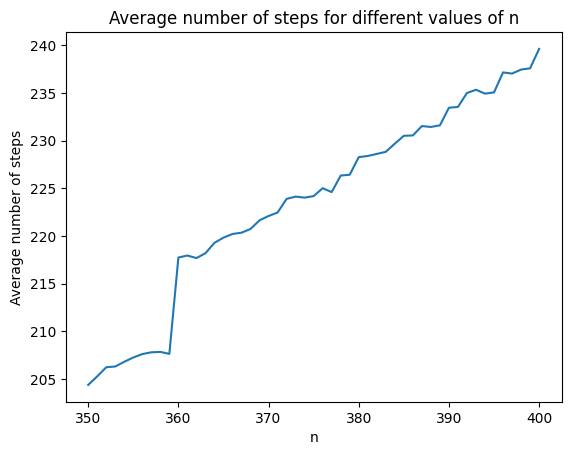

In [48]:
import random

def run_game(N):
    # steps = []  # To keep track of the steps for debugging or analysis
    num_steps = 0
    
    while N > 0:
        k = random.randint(1, 10)  # Uniformly sample k between 1 and 10
        modified_N = (N // k) * k  # Perform the operation floor(N/k)*k
        num_steps += 1
        N = modified_N  # Update N for the next iteration

    return num_steps

def run_simulation(n, num_trials):
    history = []
    for _ in range(num_trials):
        history.append(run_game(n))
    return history

n = 38
num_trials = 10000
history = run_simulation(n, num_trials)
print('Average number of steps for n = {}: {:.2f}'.format(n, np.mean(history)))

# Plot the average number of steps for each n
ns = range(350, 401)
averages = [np.mean(run_simulation(n, num_trials)) for n in ns]
plt.plot(ns, averages)
plt.xlabel('n')
plt.ylabel('Average number of steps')
plt.title('Average number of steps for different values of n')
plt.show()

In [82]:
# print the average for n=358 to n=362
for i in range(358, 363):
    print('Average number of steps for n = {}: {:.2f}'.format(i, averages[i-350]))

Average number of steps for n = 358: 207.82
Average number of steps for n = 359: 207.62
Average number of steps for n = 360: 217.73
Average number of steps for n = 361: 217.94
Average number of steps for n = 362: 217.67


Expected number of rounds for n = 358: 207.81
Expected number of rounds for n = 359: 207.81
Expected number of rounds for n = 360: 217.75
Expected number of rounds for n = 361: 217.75
Expected number of rounds for n = 362: 217.75


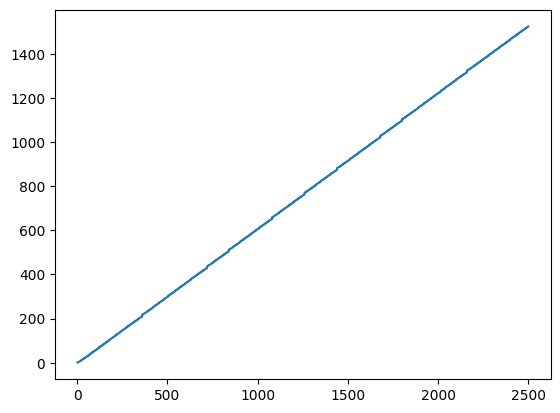

In [85]:
def compute_expected_rounds(n=500):
    T = [0.0] * (n + 1)

    for n in range(1, n + 1):
        k = 0  # Number of g=1..10 that divide n
        S = 0.0

        for g in range(1, 11):
            if n % g == 0:
                k += 1
            else:
                survivors = g * (n // g)
                S += T[survivors]

        if (10 - k) == 0:
            raise ValueError(f"Invalid state encountered for n={n} with k={k}.")

        T[n] = (10 + S) / (10 - k)

    return T

n = 2500
T = compute_expected_rounds(n)
for i in range(358,363):
    print('Expected number of rounds for n = {}: {:.2f}'.format(i, T[i]))

# Plot the expected number of rounds for each n
plt.plot(range(1, n + 1), T[1:])




Interestingly, 359 is a prime number and 360 is quite composite. I'm curious if this is a coincidence or if there is some deeper mathematical reason for this.

Average gap between T[n] and T[n+1] for prime numbers: 1.29241473379914
Average gap between T[n] and T[n+1] for composite numbers: 0.593269550388478


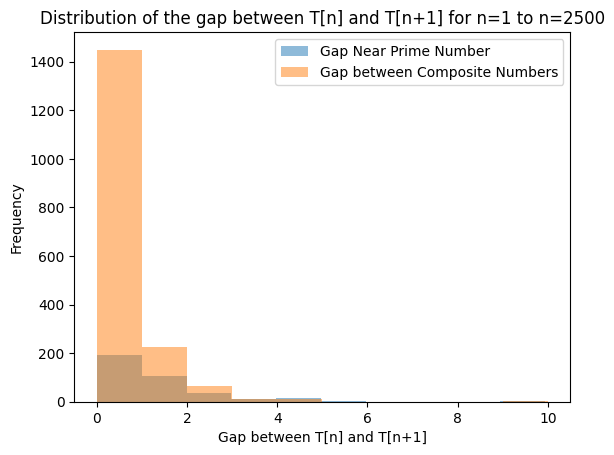

Largest gap between T[n] and T[n+1] for prime numbers: 9.941231997336558 at n = 71
Largest gap between T[n] and T[n+1] for composite numbers: 10.0 at n = 1244


In [86]:
def generate_primes(limit):
    is_prime = [True] * (limit + 1)
    p = 2
    while p * p <= limit:
        if is_prime[p]:
            for i in range(p * p, limit + 1, p):
                is_prime[i] = False
        p += 1
    prime_numbers = [p for p in range(2, limit + 1) if is_prime[p]]
    return prime_numbers

# Generate all prime numbers less than 100
primes = generate_primes(n)
# Compute the average gap between T[n] and T[n+1] for n in the prime numbers and compare to the gap between T[n] and T[n+1] where both are composite numbers
prime_gaps = []
composite_gaps = []
for i in range(len(T)):
    if (i-1 in primes):
        prime_gaps.append(T[i] - T[i-1])
    else:
        if i not in primes and i != 0:
            composite_gaps.append(T[i] - T[i-1])

print('Average gap between T[n] and T[n+1] for prime numbers:', np.mean(prime_gaps))
print('Average gap between T[n] and T[n+1] for composite numbers:', np.mean(composite_gaps))

# Plot the average gap between T[n] and T[n+1] for prime and composite numbers
plt.hist(prime_gaps, bins=10, alpha=0.5, label='Gap Near Prime Number')
plt.hist(composite_gaps, bins=10, alpha=0.5, label='Gap between Composite Numbers')
plt.xlabel('Gap between T[n] and T[n+1]')
plt.ylabel('Frequency')
plt.title('Distribution of the gap between T[n] and T[n+1] for n={} to n={}'.format(1, n))

plt.legend()
plt.show()

# Find the largest gap for both sets and it's corresponding n
max_prime_gap = max(prime_gaps)
max_prime_gap_n = prime_gaps.index(max_prime_gap)
max_composite_gap = max(composite_gaps)
max_composite_gap_n = composite_gaps.index(max_composite_gap)

print('Largest gap between T[n] and T[n+1] for prime numbers:', max_prime_gap, 'at n =', max_prime_gap_n)
print('Largest gap between T[n] and T[n+1] for composite numbers:', max_composite_gap, 'at n =', max_composite_gap_n)

I guess the gap between a prime number followed by a composite number do tend to be larger but it still doesn't really explain the enormous gap between 359 and 360, especiallyl since there is another huge gap between two composites at 1244 and 1245.

Also, it's worth mentioning that this approach can't really extend beyond 2520 since that's the smallest number that is divisible by all numbers from 1 to 10, which would obvious have an infinite expected number of rounds. From there, there computation of the expectation breaks down.